In [1]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.26.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2024.10.0 requires numpy>=1.24, but you have numpy 1.23.5 whic

In [2]:
!pip install tensorflow==2.13.0

   ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/524.1 MB 28.9 MB/s eta 0:00:18
ERROR: Operation cancelled by user


In [5]:
!pip install astroNN

  Using cached astroNN-1.1.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached astroquery-0.4.7-py3-none-any.whl.metadata (7.2 kB)
  Using cached pyvo-1.6-py3-none-any.whl.metadata (4.8 kB)
Using cached astroNN-1.1.0-py3-none-any.whl (9.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 30.0 MB/s eta 0:00:00


In [1]:
import numpy as np
# import tkinter
import matplotlib.pyplot as plt
import matplotlib.ticker

In [2]:
# matplotlib.use('TkAgg')
%matplotlib inline

In [6]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, euclidean_distances, median_absolute_error, mean_absolute_error
#import numpy as np
import pandas as pd
# from astroNN.nn.layers import MCDropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from astroNN.nn.layers import MCDropout
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.initializers import Constant, RandomNormal
from sklearn.model_selection import train_test_split
from keras.metrics import MeanSquaredError

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/RodMendez/entropyGalxiesML/refs/heads/main/data/Un%20tercio%20R500%20CC.csv")

In [126]:
# Imprimir las columnas del dataset
print(data.columns)

Index(['Name', 'R (1/3) R500X-ray', 'nelec', 'T', 'S', 'Dvel', 'Rvir', 'Mvir',
       'A', 'Hz', 'CC'],
      dtype='object')


In [127]:
from sklearn.preprocessing import StandardScaler

x_df = data[['R (1/3) R500X-ray', 'nelec', 'T', 'Dvel', 'Rvir', 'Mvir']]
x = x_df.values

In [128]:
# Inicializa el escalador para los datos de salida
y_df = data[['Hz', 'S']]
y = y_df.values

idx_to_remove = np.argwhere(np.isnan(x))[0][0]
print(idx_to_remove)

37


In [129]:
x = x[:37,:]
y = y[:37,:]


In [42]:
# Inicializa el escalador
scaler = StandardScaler()
# Ajusta el escalador a las variables de entrada
scaler.fit(x)
# Aplica la transformación
x_scaled = scaler.transform(x)

In [43]:
# Inicializar y ajustar el escalador para los datos de salida
scaler_output = StandardScaler()
scaler_output.fit(y)  # Ajustar el escalador a tus datos de salida
y_scaled = scaler_output.transform(y)  # Escalar los datos de salida

In [130]:
x_train, x_test = train_test_split(x_scaled, train_size=0.6, random_state=1, shuffle=True)
y_train, y_test = train_test_split(y_scaled, train_size=0.6, random_state=1, shuffle=True)

In [131]:
print(np.isnan(x_train).any(), np.isnan(y_train).any())  # ¿Hay NaN?
print(np.isinf(x_train).any(), np.isinf(y_train).any())  # ¿Hay Inf?


False False
False False


In [143]:
def model_regression_dropout(num_input, num_output, num_hidden=[32, 16, 8], act_fn='relu'):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, num_input))))
    for nodes in num_hidden:
      model.add(Dense(units=nodes,
                      activation=act_fn))
      model.add(MCDropout(0.1))
    model.add(Dense(units=num_output, activation="linear"))
    return model

_, ninput = np.shape(x_scaled)
_, noutput = np.shape(y_scaled)
# Compile Keras model
model = model_regression_dropout(num_input=ninput, num_output=noutput, num_hidden=[200, 200, 200, 200], act_fn='relu')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 200)               1400      
                                                                 
 MCDropout_22 (MCDropout)    (None, 200)               0         
                                                                 
 dense_28 (Dense)            (None, 200)               40200     
                                                                 
 MCDropout_23 (MCDropout)    (None, 200)               0         
                                                                 
 dense_29 (Dense)            (None, 200)               40200     
                                                                 
 MCDropout_24 (MCDropout)    (None, 200)               0         
                                                                 
 dense_30 (Dense)            (None, 200)              

In [144]:
print(model.input_shape)

(None, 6)


Epoch 1/200
22/22 [==============================] - 2s 23ms/step - loss: 0.9417 - val_loss: 1.0025
Epoch 2/200
22/22 [==============================] - 0s 8ms/step - loss: 0.8917 - val_loss: 0.9598
Epoch 3/200
22/22 [==============================] - 0s 9ms/step - loss: 0.7631 - val_loss: 0.9663
Epoch 4/200
22/22 [==============================] - 0s 10ms/step - loss: 0.6720 - val_loss: 0.9077
Epoch 5/200
22/22 [==============================] - 0s 9ms/step - loss: 0.6001 - val_loss: 0.9055
Epoch 6/200
22/22 [==============================] - 0s 9ms/step - loss: 0.5107 - val_loss: 0.9214
Epoch 7/200
22/22 [==============================] - 0s 8ms/step - loss: 0.4446 - val_loss: 0.8957
Epoch 8/200
22/22 [==============================] - 0s 10ms/step - loss: 0.3858 - val_loss: 0.8465
Epoch 9/200
22/22 [==============================] - 0s 10ms/step - loss: 0.3665 - val_loss: 0.7671
Epoch 10/200
22/22 [==============================] - 0s 10ms/step - loss: 0.2735 - val_loss: 0.7384
Epoc

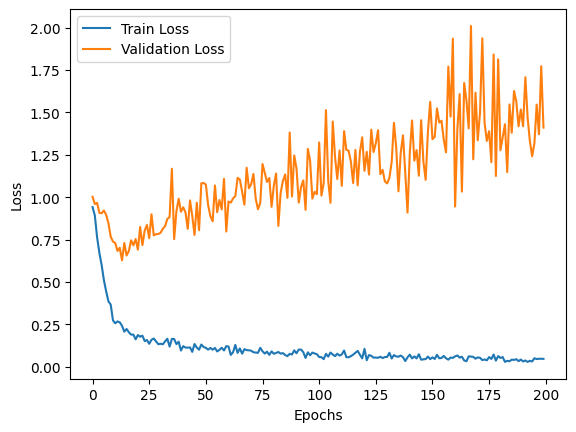

In [145]:
# Define parameters
batch_size = 1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer)

# Callbacks
# callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100, min_lr=1e-6)

# Train the model
model_train = model.fit(x_train, y_train, batch_size=batch_size,
                        epochs=200, verbose=1,
                        validation_data=(x_test, y_test))
                        # callbacks=[callback_early_stopping, callback_reduce_lr])

# Plot training history
import matplotlib.pyplot as plt

plt.plot(model_train.history['loss'], label='Train Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [146]:
# Generate test data
test_batch_size = len(x_test)

mc_dropout_num = 50 # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, noutput))

for i in range(mc_dropout_num):
    predictions[i] = model.predict(scaler.transform(x_test))

# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

1/1 [==============================] - 0s 24ms/step


In [147]:
# Definir las listas para almacenar las métricas
mse_scores = []
mae_scores = []

mse = mean_squared_error(y_test, prediction_mc_dropout)
mae = mean_absolute_error(y_test, prediction_mc_dropout)
mse_scores.append(mse)
mae_scores.append(mae)


In [148]:
print(f"MSE promedio: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"MAE promedio: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")

MSE promedio: 217.3985 ± 0.0000
MAE promedio: 7.3081 ± 0.0000


In [149]:
# Calcular los errores absolutos (MAE) y cuadrados (MSE)
errors = y_test - prediction_mc_dropout
mae = np.abs(errors)
mse = np.square(errors)

# Calcular la varianza de los errores (MAE y MSE)
var_mae = np.var(mae)
var_mse = np.var(mse)

print(f"Varianza del MAE: {var_mae}")
print(f"Varianza del MSE: {var_mse}")


Varianza del MAE: 163.98946288428132
Varianza del MSE: 911139.7667393779


In [150]:
# La desviación estándar de las predicciones ya está calculada como std_mc_dropout
var_predictions = np.var(predictions, axis=0)
print(f"Varianza de las predicciones: {np.mean(var_predictions)}")


Varianza de las predicciones: 6.279643918474023


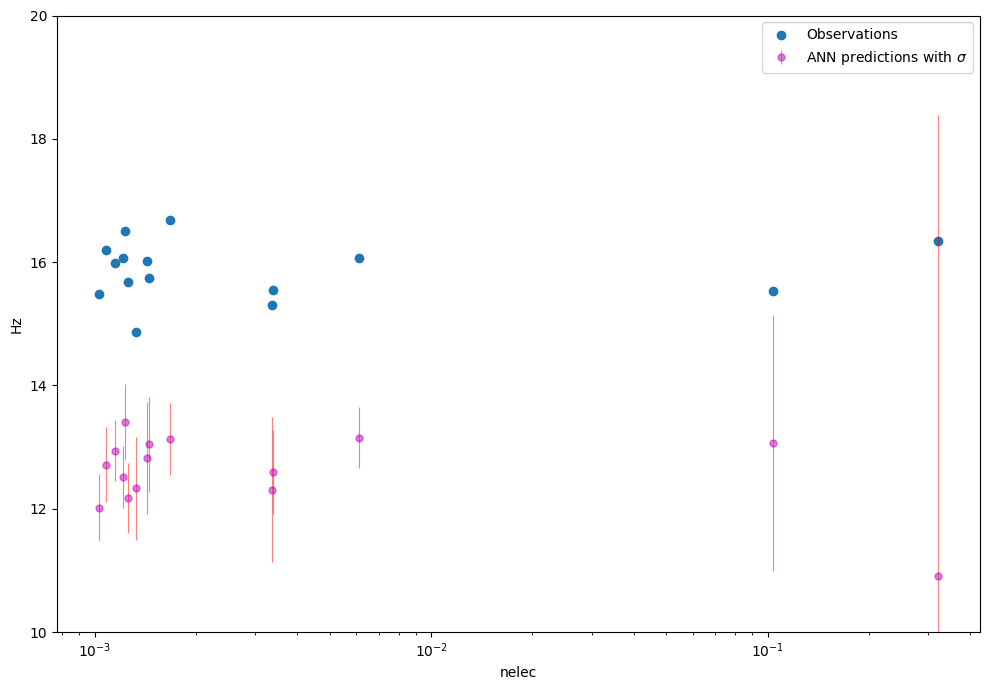

In [156]:
# Plotting
plt.figure(figsize=(10, 7), dpi=100)
# plt.figure(figsize=(5, 4), dpi=100)

# x tiene 6 dims, y 2
# x 'R (1/3) R500X-ray', 'nelec', 'T', 'Dvel', 'Rvir', 'Mvir']]
# en y, 0 Hz, 1 Sx
xidx = 1
yidx = 0
sigma = std_mc_dropout[:, yidx]
# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.scatter(scaler.inverse_transform(x_test)[:,xidx], scaler_output.inverse_transform(y_test)[:,yidx], label='Observations')
# plt.scatter(scaler.inverse_transform(x_test)[:,0], scaler_output.inverse_transform(prediction_mc_dropout)[:,0], label='ANN predictions')
plt.errorbar(scaler.inverse_transform(x_test)[:,xidx], scaler_output.inverse_transform(prediction_mc_dropout)[:,yidx], yerr=sigma, markersize=5, fmt='o',
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m',
             label='ANN predictions with $\sigma$')
plt.xlabel(x_df.columns[xidx])
plt.ylabel(y_df.columns[yidx])
if yidx == 0:
  plt.ylim(10, 20)
if xidx == 1 or xidx == 2:
  plt.xscale('log')
plt.legend()
# plt.show()
plt.tight_layout()

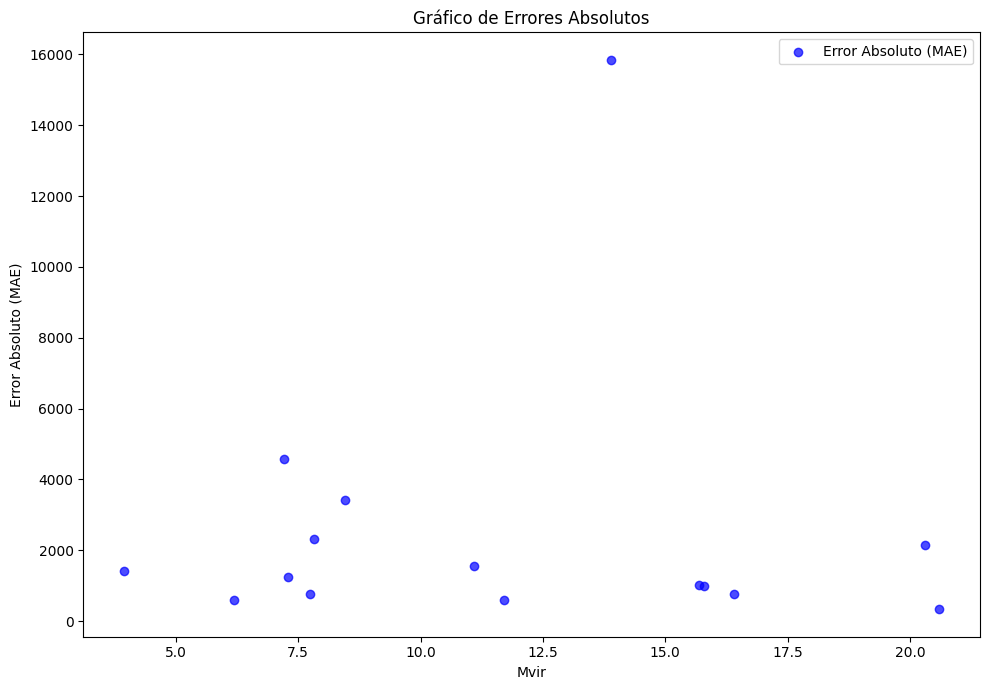

In [152]:
# Gráfico de dispersión de los errores absolutos (MAE)
plt.figure(figsize=(10, 7))
plt.scatter(scaler.inverse_transform(x_test)[:, xidx ], scaler_output.inverse_transform(mae)[:, yidx], c='b', label='Error Absoluto (MAE)', alpha=0.7)
plt.xlabel(x_df.columns[xidx])
plt.ylabel('Error Absoluto (MAE)')
plt.title('Gráfico de Errores Absolutos')
plt.legend()
plt.tight_layout()
plt.show()


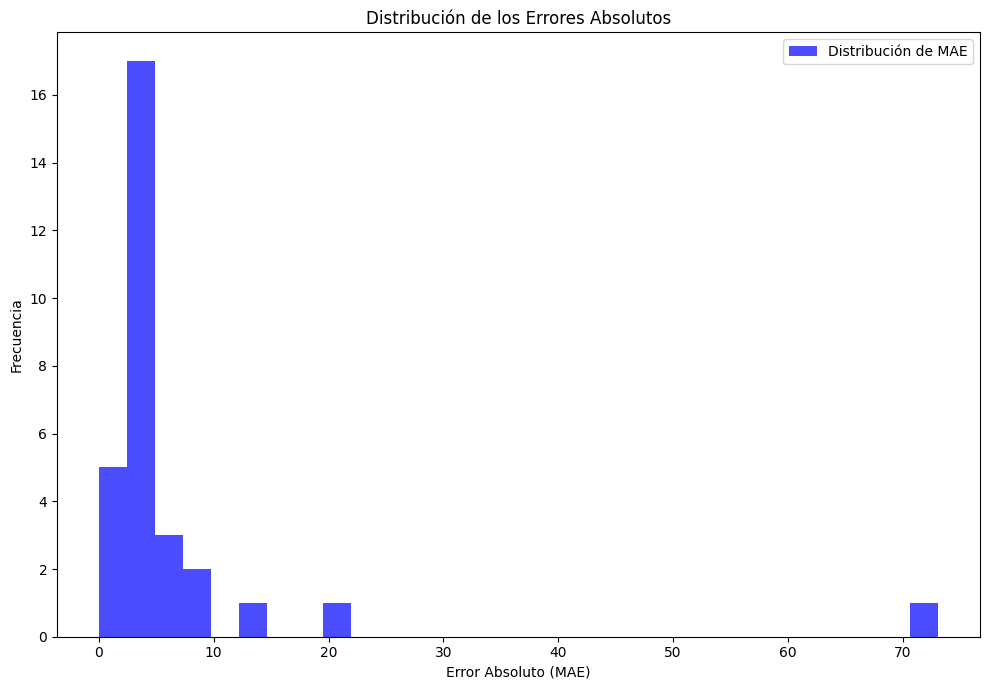

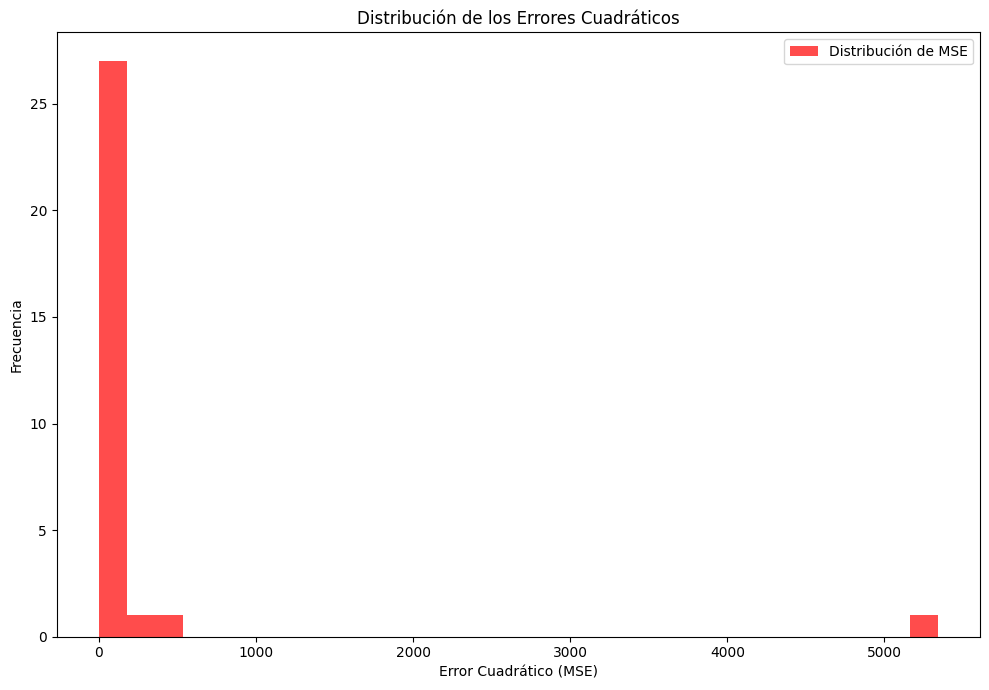

In [153]:
# Distribución de los errores
plt.figure(figsize=(10, 7))
plt.hist(mae.flatten(), bins=30, color='blue', alpha=0.7, label='Distribución de MAE')
plt.xlabel('Error Absoluto (MAE)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores Absolutos')
plt.legend()
plt.tight_layout()
plt.show()

# También puedes hacer lo mismo para MSE
plt.figure(figsize=(10, 7))
plt.hist(mse.flatten(), bins=30, color='red', alpha=0.7, label='Distribución de MSE')
plt.xlabel('Error Cuadrático (MSE)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores Cuadráticos')
plt.legend()
plt.tight_layout()
plt.show()
